# Сборный проект № 1. Анализ компьютерного интернет-магазина «Стримчик»

Анализируем интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.В нашем распоряжении некоторые данные,нужно взглянуть на доступную информацию,предобработать данные,выбрать актуальную информацию,провести анализ и сравнительную статистику,так же проверить гипотезы для построения прогноза на 2017 год.

### Шаг. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats as st

In [4]:
try:
    df = pd.read_csv('/datasets/games.csv', sep=',')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')

In [5]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


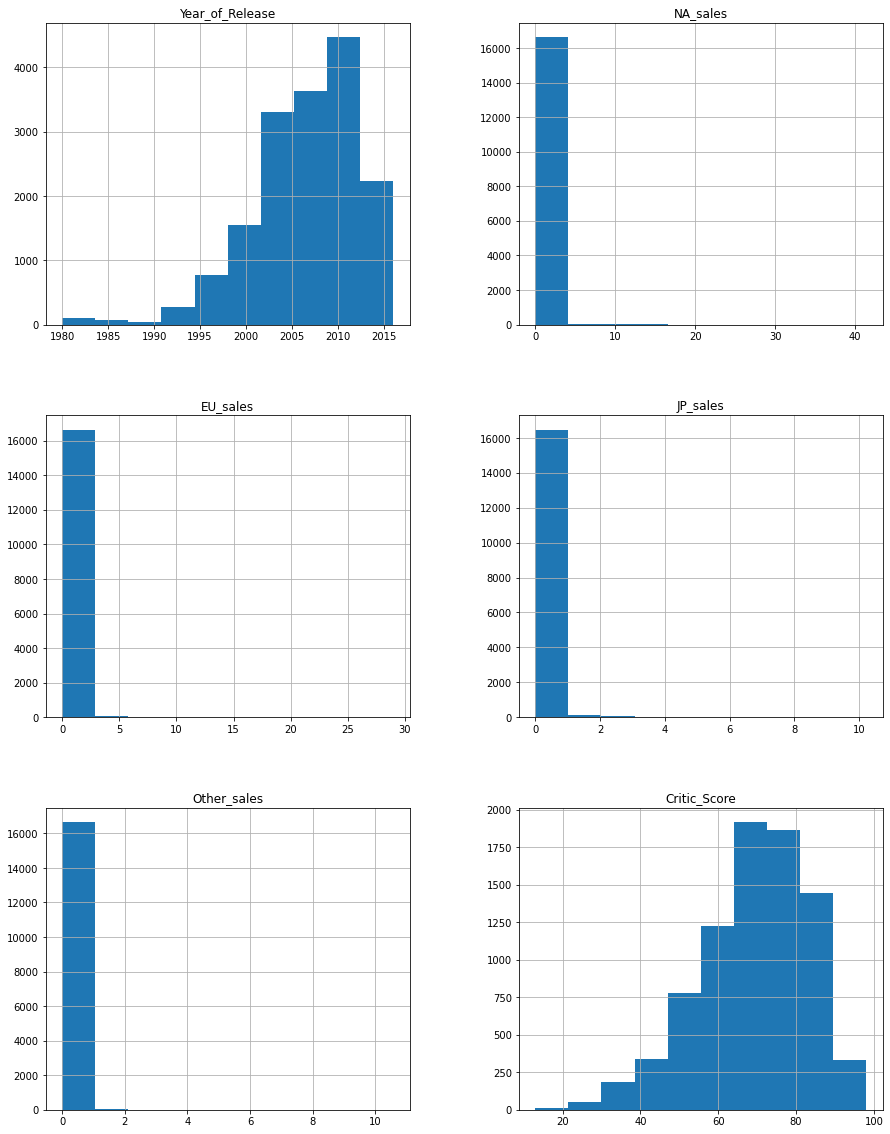

In [6]:
df.hist(figsize=(15, 20));

**Вывод:** Подключил необходимые библиотеки, скачал датасет и изучил общую информацию по таблице.

### Шаг. Подготовьте данные

#### Замена названия столбцов (приведем к нижнему регистру)

In [7]:
df.columns = df.columns.str.lower()

Перевел название столбцов в нижний регистр.

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
df.query('genre.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
df.dropna(subset=['name'], inplace=True)

Посмотрел на пропуски в столбцах,в столбце 'name' их нечем заменить,удалим эти строки(так же удалятся строки со столбцом 'genre').

In [11]:
release = df.query('year_of_release.notnull()')

In [12]:
def function_release(row, **kwargs):
    
    rows = release[release['name'] == row['name']]
    
    if len(rows) > 0:
        
        return rows.iloc[0]['year_of_release']
    
    return row['year_of_release']

df['year_of_release'] = df.apply(function_release, axis=1)

In [13]:
df.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
df.dropna(subset=['year_of_release'], inplace=True)

Так как многие игры выпускались на разных платформах, то некоторые пропуски даты релиза можно заменить анологичными,имеющиемся в одних и тех же играх на других платформах,опэтому в  столбце "year_of_release" с помощью фунуции заменил их на анологичные,остальные строки удалил.

In [15]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Присутствует аббревиатура 'tbd' значит (to be determined, to be done) в столбце с оценкой пользователей,данным способом заменим их на nan.

Пропуски в столбцах 'user_score' и 'critic_score' заменил на значения-индикаторы.

In [18]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

In [19]:
df['rating'].fillna(value='NDA', inplace=True)

In [20]:
df['rating'].unique()

array(['E', 'NDA', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

В столбце 'rating' заменим анологичное категории рейтингу 'K-A' на используемый сейчас значение 'E',пропуски замолним аббревиатурой NDA(нет данных),она будет служить маркером. 

In [21]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         9027
rating                0
dtype: int64

In [22]:
df['year_of_release'] = df['year_of_release'].astype(int)

Заменил тип данных в столбеце 'year_of_release' на (int64)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [24]:
df.duplicated().sum()

0

Если взять весь датасет,то дубликатов нет

In [25]:
df.duplicated(subset = ['name', 'platform', 'year_of_release'], keep=False).sum()

8

In [26]:
df.drop_duplicates(subset = ['name', 'platform', 'year_of_release'], keep='first', inplace=True)

In [27]:
df.reset_index(drop= True , inplace= True )

Взглянув на данные по трем столбцам присутствуют дубликаты,оставил первый,второй удалил,сбросил индексы.

In [28]:
df['sum_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Добавил столбец с общей суммой продаж по миру.

**Вывод:** На данном шаге были обработаны данные по датафрейму,название столбцов приведены в нижний регистр,пропуски в столбцах удалил,где это было возможно,другие заменил либо на аналогичные, либо на маркеры,процент потери 0,9,сбросил индексы,заменил неиспользуемую категорию рейтинга на актульную и добавил столбец с суммой продаж по всем регионам.

### Шаг. Проведите исследовательский анализ данных

#### Cколько игр выпускалось в разные годы

In [29]:
df['year_of_release'].value_counts().to_frame()

,year_of_release
2008,1433
2009,1426
2010,1264
2007,1208
2011,1167
2006,1016
2005,931
2002,828
2004,783
2003,747


[Text(0.5, 0, 'Год релиза'), Text(0, 0.5, 'Количество')]

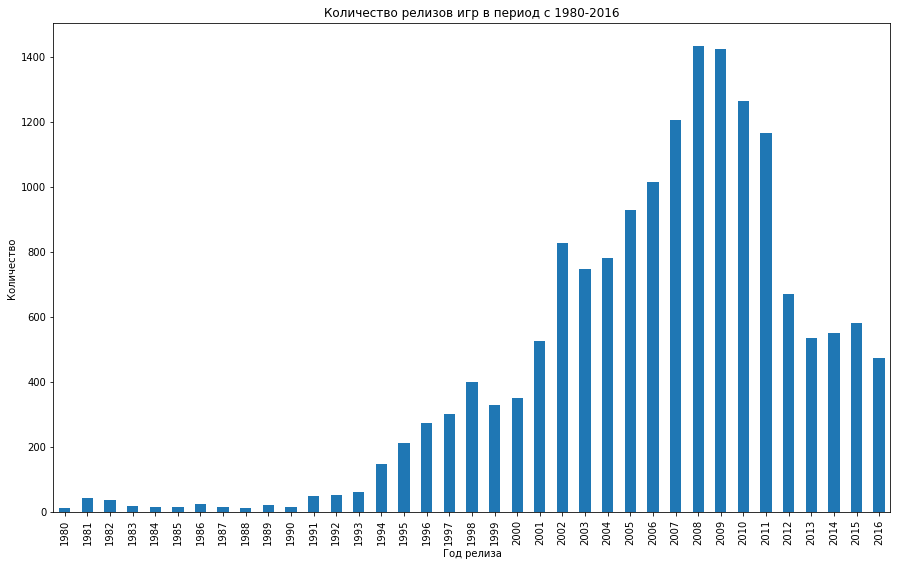

In [30]:
(df.pivot_table(index='year_of_release', values='name', aggfunc='count')
   .plot.bar(legend=False, figsize = (15,9), title='Количество релизов игр в период с 1980-2016')
   .set(xlabel='Год релиза', ylabel='Количество')
)

**Вывод:** Судя по данным,до 1995 года выпускалось до 200 игр в год,что очень мало и не является актуальным периодом для анализа.Пик пришелся с 2006 по 2011 год,далее идет спад вплоть до 2016 года.

#### Kак менялись продажи по платформам по годам

In [31]:
df_platform = df.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
df_platform = df_platform.reset_index()
df_platform

,platform,sum_sales
0,PS2,1247.16
1,X360,965.36
2,PS3,934.70
3,Wii,903.31
4,DS,804.28
5,PS,727.58
6,PS4,314.14
7,GBA,313.73
8,PSP,293.57
9,PC,258.78


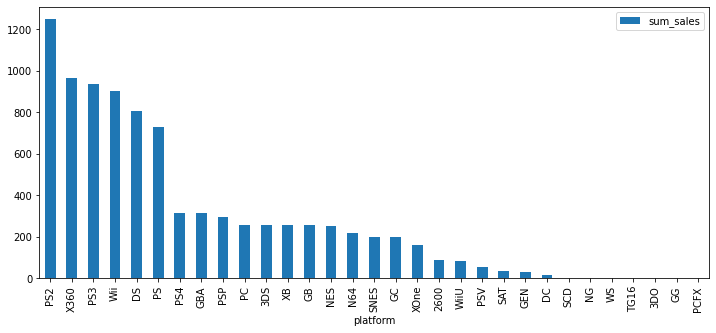

In [32]:
df_platform.plot.bar(x='platform', y='sum_sales',figsize=(12, 5));

plt.show()

In [33]:
top_platforms = df_platform.query('sum_sales > 400')['platform'].tolist()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

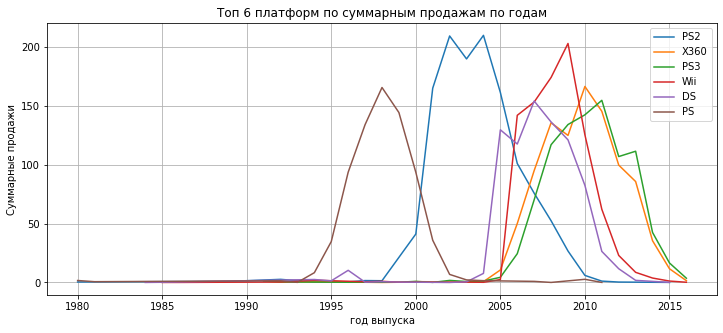

In [34]:
for name in top_platforms:
    (df.query('platform == @name')
       .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc ='sum')['sum_sales']
       .plot(figsize=(12, 5), label=name, grid=True)
    )
    plt.title('Топ 6 платформ по суммарным продажам по годам')
    plt.xlabel('год выпуска')
    plt.ylabel('Cуммарные продажи')
    plt.legend()

**Вывод:** Взяв топ 6 платформ с наибольшими суммарными продажами и построив распределение по годам, можно сделать вывод что средний срок жизни платформы около 10 лет.

Учитывая высокую динамичность рынка,можно сделать выводы что актуальным периодом будет с 2013 - 2016,иначе мы рисскуем взять платформы,которые уже не актуальны и не подойдут для анализа.

In [35]:
df_actual = df.query('year_of_release > 2012')

#### Какие платформы лидируют по продажам, растут или падают

In [36]:
platform_leader = (df_actual.pivot_table(index = 'platform', values = 'sum_sales', aggfunc ='sum')
         .sort_values(by='sum_sales', ascending=False)
         .reset_index()
)
platform_leader

,platform,sum_sales
0,PS4,306.64
1,PS3,173.98
2,XOne,157.04
3,3DS,136.88
4,X360,134.24
5,WiiU,61.62
6,PC,40.11
7,PSV,30.49
8,Wii,13.71
9,PSP,4.56


In [37]:
top_platforms = platform_leader.query('sum_sales > 5')['platform'].tolist()

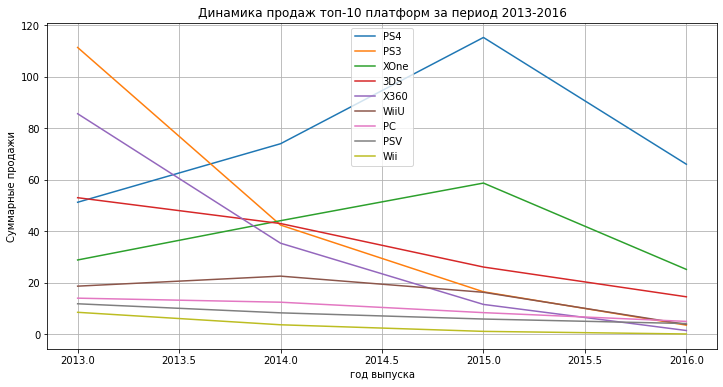

In [38]:
for name in top_platforms:
    (df_actual.query('platform == @name')
       .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc ='sum')['sum_sales']
       .plot(figsize=(12, 6), label=name, grid=True)
    )
    plt.title('Динамика продаж топ-10 платформ за период 2013-2016')
    plt.xlabel('год выпуска')
    plt.ylabel('Cуммарные продажи')
    plt.legend()

**Вывод:** Построив график динамики продаж за выбранный "Актуальный период",можно выделить две крупные платформы,это PS4 и Xone,эти две платформы потенциально прибыльные,у многих платформ наблюдается спад,видимо жизненый цикл заканчивается,это такие платформы как PS3,X360,3DS.

#### Постром график «ящик с усами» по глобальным продажам игр в разбивке по 5 актуальным платформам

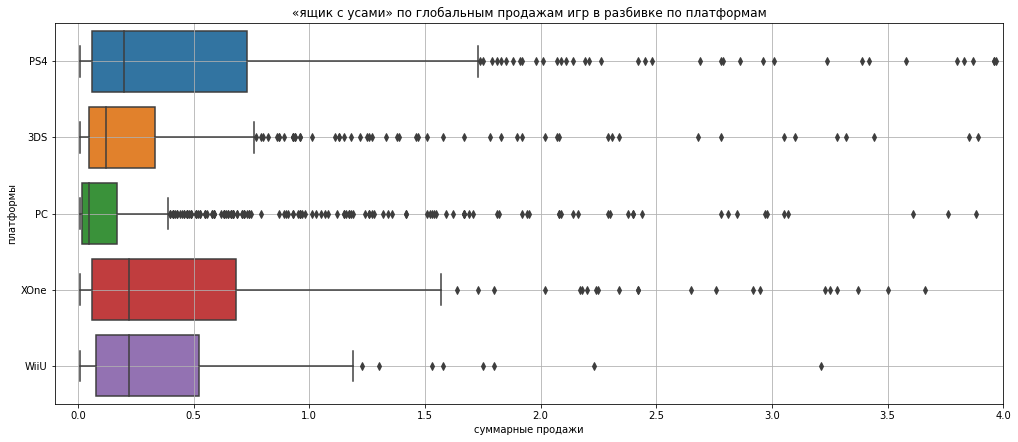

In [39]:
list_platforms = df_actual
list_platforms = ['PS4', 'XOne', 'PC', '3DS', 'WiiU']
df_with = df[df['platform'].isin(list_platforms)]

plt.figure(figsize=(17, 7))
plt.xlim(-0.1, 4)
plt.title('«ящик с усами» по глобальным продажам игр в разбивке по платформам')
sns.boxplot(x='sum_sales', y='platform', data=df_with)
plt.xlabel('cуммарные продажи')
plt.ylabel('платформы')
plt.grid(True);

**Вывод:** Как мы видим лидером продаж является PS4,у нее и самый большой межквартильный размах,PC уступает всем конкурентам и размах у нее самый маленький,что может нам сказать о стабильности в продажах.Медианна у PS4, XOne и Wii примерно одинаковая,у PC, 3DS поменьше.Судя по частоте выбросов у PC самое плотное.Наличие выбросов показывает что в зависимости от игры,эсть топ продаж,которые опережают среднее значение.

#### Как влияют на продажи внутри одной популярной платформы(PS2) отзывы пользователей и критиков

In [40]:
df_critic = df[df['platform'] == 'PS2']

0.3954055368563989

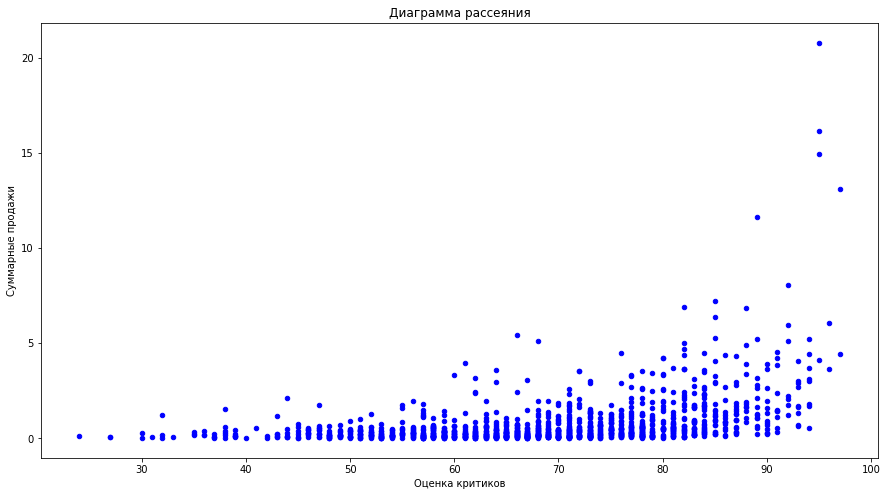

In [41]:
df_critic.plot.scatter(x='critic_score' , y='sum_sales', subplots=True, figsize=(15,8), c = 'b', s = 20)

plt.title('Диаграмма рассеяния')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')

df_critic['critic_score'].corr(df_critic['sum_sales'])

In [42]:
df_user = df[df['platform'] == 'PS2']

0.17378036664164548

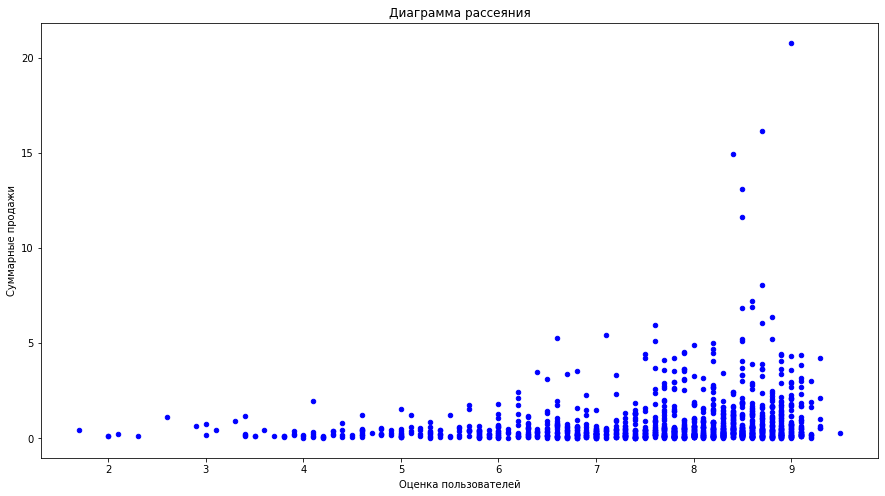

In [43]:
df_user.plot.scatter(x='user_score' , y='sum_sales', subplots=True, figsize=(15,8), c = 'b', s = 20)

plt.title('Диаграмма рассеяния')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')

df_user['user_score'].corr(df_user['sum_sales'])

**Вывод:** Как мы видим по диаграммам и значению корреляции,можно сделать вывод что зависимость между оценками и продажами есть,между оценками критиков и продажами связь сильнее,так же судя по диаграммам частота встречаемости значений в верхнем правом углу у критиков выше,что говорит о более высокой связи нежели у пользователей.

#### Соотнесите выводы с продажами игр на других платформах

Корреляция на платформе XOne

In [44]:
(df.query('platform == "XOne"')['critic_score']
  .corr(df.query('platform == "XOne"')['sum_sales'])
)

0.4169983280084017

In [45]:
(df.query('platform == "XOne"')['user_score']
  .corr(df.query('platform == "XOne"')['sum_sales'])
)

-0.06892505328279414

Корреляция на платформе PS4

In [46]:
(df.query('platform == "PS4"')['critic_score']
  .corr(df.query('platform == "PS4"')['sum_sales'])
)

0.40656790206178095

In [47]:
(df.query('platform == "PS4"')['user_score']
  .corr(df.query('platform == "PS4"')['sum_sales'])
)

-0.031957110204556376

**Вывод:** Значения корреляций различаются, но общая тенденция проглядывается. Оценка критиков немного сильнее коррелирует с продажами, хотя эта связь не такая сильная. Корреляции между  оценками пользователей и продажами совсем нет. Можно сказать что оценки экспертов хоть как то,но влияют на продажи и оценки пользователей не влияют. 

#### Общее распределение игр по жанрам

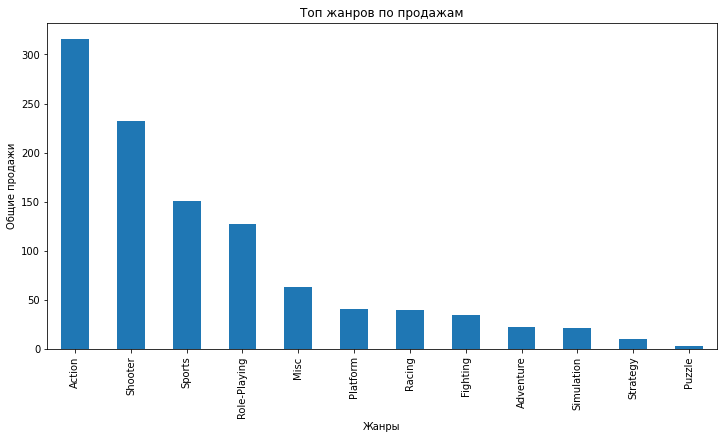

In [48]:
(df_actual.pivot_table(index='genre', values='sum_sales', aggfunc='sum')
          .sort_values('sum_sales', ascending=False)
          .plot.bar(y='sum_sales', figsize=(12, 6), legend=False, title='Топ жанров по продажам')
          .set(xlabel='Жанры', ylabel='Общие продажи')
)

plt.show()

Судя по графику,можно было сказать что самый популярный жанр Action, затем идет Shooter,за ним Sport,посмотрим на диаграмму размаха.

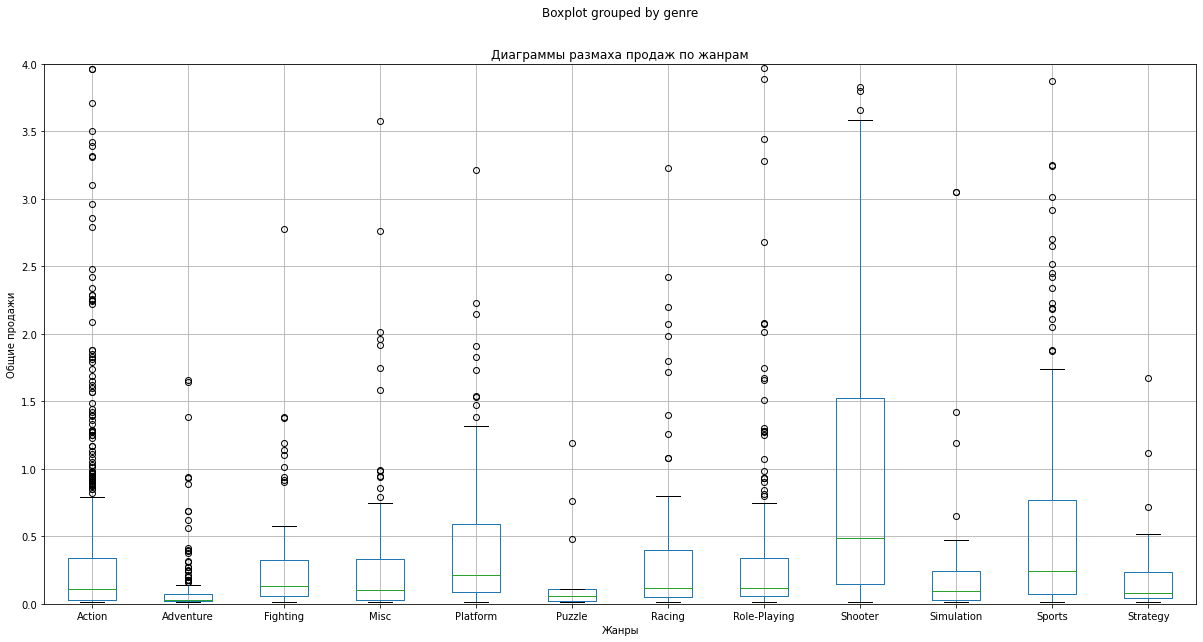

In [49]:
(df_actual[['sum_sales', 'genre']].boxplot(column='sum_sales', by='genre', figsize=(20,10))
)
plt.title('Диаграммы размаха продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Общие продажи')

plt.ylim(0, 4)
plt.show()

In [50]:
(df_actual.pivot_table(index='genre', values='sum_sales', 
                aggfunc=['count', 'mean', 'std', 'sum', 'median'])
 .sort_values(('median', 'sum_sales'), ascending=False)
)

,count,mean,std,sum,median
,sum_sales,sum_sales,sum_sales,sum_sales,sum_sales
genre,,,,,
Shooter,182,1.275275,2.033393,232.10,0.485
Sports,213,0.706808,1.221402,150.55,0.240
Platform,73,0.557945,0.797059,40.73,0.210
Fighting,75,0.462533,1.079994,34.69,0.130
Role-Playing,256,0.497461,1.428548,127.35,0.120
Racing,83,0.477229,0.974187,39.61,0.120
Action,740,0.427135,1.273341,316.08,0.110
Misc,154,0.409091,1.010488,63.00,0.105


**Вывод:** 
- Судя по диаграмме размаха,самый прибыльный жанр является Shooter и судя по межквартильному размаху и судя мо медианне,и этот жанр сильно выделяется на фоне других.
- Если обратить внимание на диагрумму,то жанр Adventure является не очень прибыльным жанром,хотя у него очень много выбросов,в отличие от такого же менее прибыльно чем все остальные жанры: Puzzle.
- Так же не плохо себ показывают жанры Sport и  Platform.

### Шаг. Составьте портрет пользователя каждого региона

#### Самые популярные платформы (топ-5)

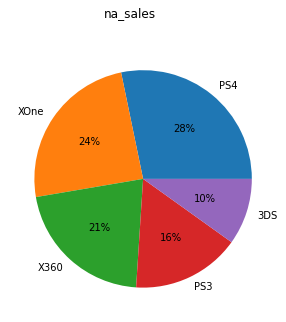

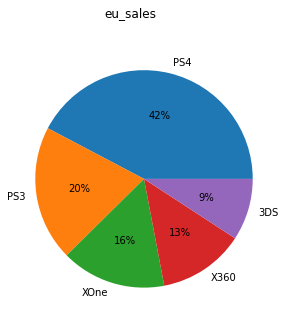

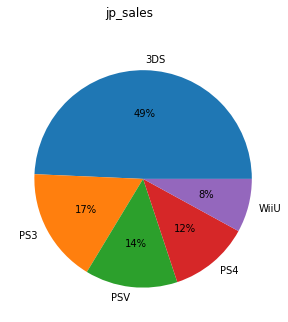

In [51]:
def function(index, values):
    
    pivot_function = df_actual.pivot_table(index=index, values=values, aggfunc='sum').sort_values(values, ascending=False).head()
    pivot_function =  pivot_function.plot(kind='pie', autopct='%1.0f%%', subplots=True, figsize=(15, 5), title = values)
 
    plt.legend('', frameon=False)
    plt.ylabel('')
    plt.show()
    return  pivot_function
function(index='platform', values = 'na_sales')
function(index='platform', values = 'eu_sales')
function(index='platform', values = 'jp_sales');

**Вывод:** В разных регионах преобладают разные платформы.
- В NA первое и второе место с примерно равными продажами делят PS4 и XAone соответственно.Далее идут устаревшие платформы  PS3 и X360,пятерку замыкает 3DS с 9%. 
- В EU большую долю занимают PS разных поколений, PS4 42%, PS3 20%, далее идут XBOX разных поколений XOne и X360,замыкают пятерку 3DS с 10%. 
- В JP большую долю занимает 3DS c 49%, PS3 не потерявший свою популярность на втором месте с 17%, далее PSV с 14%, PS4 с 12% и WiiU c 8% соответственно.

#### Самые популярные жанры (топ-5)

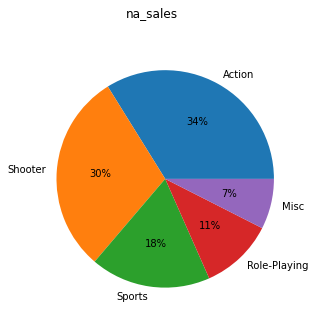

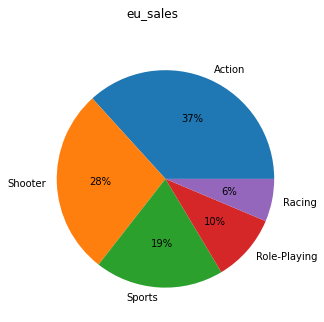

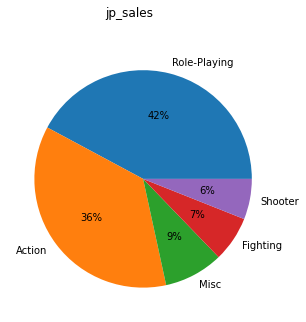

In [52]:
def function(index, values):
    
    pivot_function = df_actual.pivot_table(index=index, values=values, aggfunc='sum').sort_values(values, ascending=False).head()
    pivot_function =  pivot_function.plot(kind='pie', autopct='%1.0f%%', subplots=True, figsize=(15, 5), title = values);
 
    plt.legend('', frameon=False)
    plt.ylabel('')
    plt.show()
    return  pivot_function
function(index='genre', values = 'na_sales')
function(index='genre', values = 'eu_sales')
function(index='genre', values = 'jp_sales');

**Вывод:**  В NA и В EU преобладают примерно одинаковые жанры, в JP они разительно отличаются.
- В NA первое и второе место с примерно равными продажами делят Action и Shooter соответственно.Далее идут Sport и Role-Playing,пятерку замыкает Misc c 7%. 
- В EU почти тоже самое, первое и второе место с примерно равными продажами делят Action и Shooter соответственно.Далее идут Sport и Role-Playing,пятерку замыкает Racing c 6%.
- В JP большую долю занимает Role-Playing c 42%, далее идет жанр Action с 36%, остальные значительно отстают и не занимают больше 10% каждый, долю рынка.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [53]:
(df_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum')
          .sort_values('na_sales', ascending=False)
)

,na_sales
rating,
M,162.15
NDA,81.79
E,78.89
E10+,54.23
T,49.59


In [54]:
(df_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
 .sort_values('eu_sales', ascending=False)
)

,eu_sales
rating,
M,142.84
E,83.14
NDA,72.75
E10+,42.65
T,41.94


In [55]:
(df_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
 .sort_values('jp_sales', ascending=False)
)


,jp_sales
rating,
NDA,80.15
T,19.79
E,15.12
M,13.53
E10+,5.89


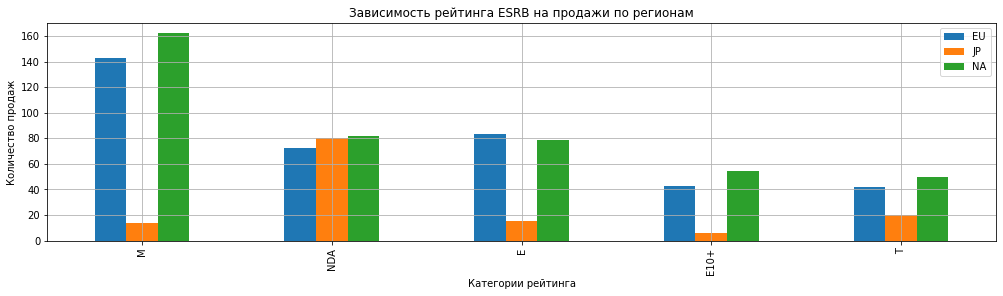

In [56]:
(df_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
 .sort_values('na_sales', ascending=False)
 .plot.bar(grid=True, figsize=(17, 4))
)
plt.title('Зависимость рейтинга ESRB на продажи по регионам')
plt.xlabel('Категории рейтинга')
plt.ylabel('Количество продаж')
plt.legend(['EU', 'JP', 'NA'])
plt.show()

**Вывод:** Большое количество группы с пропусками во всех регионах расспределились примерно одинаково.В NA и EU места распределились одинаково и каждое значение в возрасной категории М примерно одинаково продалось.В JP ситуация разительно другая,больше всего продаж с категорией Т,а вот в NA и EU эта категория занимает последнее место.Судя по тому что в NA и EU ситуация одинаковая,думаю рейтинг ESRB влияет на эти регионы,а вот на JP нет.

### Шаг. Проверьте гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Нулевая гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC разные.

In [57]:
first_group_platform = df_actual.query('platform == "XOne" & user_score > 0')

second_group_platform = df_actual.query('platform == "PC" & user_score > 0')

alpha = .05

results = st.ttest_ind(
    first_group_platform['user_score'], 
    second_group_platform['user_score'])

print(f'p-value: {results.pvalue}')


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.16926241222611163
Нет оснований отвергнуть нулевую гипотезу


**Вывод:** Подтвердили нулевую гипотезу,есть основания говорить, что  cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

- Нулевая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [58]:
first_group_genre = df_actual.query('genre == "Action" & user_score > 0')

second_group_genre = df_actual.query('genre == "Sports" & user_score > 0')

alpha = .05

results = st.ttest_ind(
    first_group_genre['user_score'], 
    second_group_genre['user_score'])

print(f'p-value: {results.pvalue}')


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 4.9104336460424685e-27
Отвергаем нулевую гипотезу


**Вывод:** Отвергли нулевую гипотезу,средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Шаг. Напишите общий вывод

По итогам проделанной работы было сделанно следующее:
#### Открыл файл с данными и изучил иформацию
- Загрузил данные из файла в датафрейм.
- Вывел первые строки,изучил общую информацию о датафрейме.Данные представлены за период с 1980 - 2016 годы,есть названия игр,их жанр и продажи в разных регионах,так же есть оценки и возрастной рейтинг.
#### Предобработал данные
- Перевел название столбцов в нижний регистр.
- Удалил строки с пропусками в столбцах 'name' и 'genre',в общей сложности их количество ровняется двум.
- С помощью функции заменил пропуски в графе год релиза на тот год,который представлен у игры на другой платформе,далее удалил 146 строк.
- Аббревиатуру 'tbd',что значит (to be determined, to be done) в столбце с оценкой пользователей,данным способом заменим их на nan.
- Пропуски в столбцах 'user_score' и 'critic_score' оставил без изменений,их заполнять либо удалять нет смысла.
- В столбце 'rating' заменим анологичное категории рейтингу 'K-A' на используемый сейчас значение 'E',пропуски замолним аббревиатурой NDA(нет данных),она будет служить маркером.
- Заменил тип данных в столбеце 'year_of_release' на (int64).
- Взглянув на данные по трем столбцам присутствуют дубликаты,оставил первый,второй удалил,сбросил индексы.Если взять весь датасет,то дубликатов нет.
#### Провел исследовательский анализ данных
- Вывел и изучил количество игр в разные годы.Судя по данным,до 1995 года выпускалось до 200 игр в год,что очень мало и не является актуальным периодом для анализа.Пик пришелся с 2006 по 2011 год,далее идет спад вплоть до 2016 года.
- Вывел и изучил как менялись продажи по платформам по годам.Взяв топ 6 платформ с наибольшими суммарными продажами и построив распределение по годам, можно сделать вывод что средний срок жизни платформы около 10 лет.
- Изучил какие платформы лидируют по продажам, растут или падают.Учитывая высокую динамичность рынка,можно сделать выводы что актуальным периодом будет с 2013 - 2016,иначе мы рисскуем взять платформы,которые уже не актуальны и не подойдут для анализа.
- Построив график динамики продаж за выбранный "Актуальный период",можно выделить две крупные платформы,это PS4 и Xone,эти две платформы потенциально прибыльные,у многих платформ наблюдается спад,видимо жизненый цикл заканчивается,это такие платформы как PS3,X360,3DS.
-  Построиил график «ящик с усами» по глобальным продажам игр в разбивке по 5 актуальным платформам.Лидером продаж является PS4,у нее и самый большой межквартильный размах,PC уступает всем конкурентам и размах у нее самый маленький,что может нам сказать о стабильности в продажах.Медианна у PS4, XOne и Wii примерно одинаковая,у PC, 3DS поменьше.Судя по частоте выбросов у PC самое плотное.Наличие выбросов показывает что в зависимости от игры,эсть топ продаж,которые опережают среднее значение.
- Изучил влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы(PS2).Судя по диаграммам и значению корреляции,можно сделать вывод что зависимость между оценками и продажами есть,между оценками критиков и продажами связь сильнее,так же судя по диаграммам частота встречаемости значений в верхнем правом углу у критиков выше,что говорит о более высокой связи нежели у пользователей.
- Соотнес выводы с продажами игр на других платформах.Значения корреляций различаются, но общая тенденция проглядывается. Оценка критиков немного сильнее коррелирует с продажами, хотя эта связь не такая сильная. Корреляции между оценками пользователей и продажами нет. Можно сказать что оценки экспертов хоть как то,но влияют на продажи и оценки пользователей не влияют.
- Сделал  Общее распределение игр по жанрам,построил диаграмму размаха.Судя по диаграмме размаха,самый прибыльный жанр является Shooter и судя по межквартильному размаху и судя мо медианне,и этот жанр сильно выделяется на фоне других.Если обратить внимание на диагрумму,то жанр Adventure является не очень прибыльным жанром,хотя у него очень много выбросов,в отличие от такого же менее прибыльно чем все остальные жанры: Puzzle.Так же не плохо себ показывают жанры Sport и Platform.
#### Составил портрет пользователя каждого региона
Самые популярные платформы (топ-5):
В разных регионах преобладают разные платформы.
- В NA первое и второе место с примерно равными продажами делят PS4 и XAone соответственно.Далее идут устаревшие платформы PS3 и X360,пятерку замыкает 3DS с 9%.
- В EU большую долю занимают PS разных поколений, PS4 42%, PS3 20%, далее идут XBOX разных поколений XOne и X360,замыкают пятерку 3DS с 10%.
- В JP большую долю занимает 3DS c 49%, PS3 не потерявший свою популярность на втором месте с 17%, далее PSV с 14%, PS4 с 12% и WiiU c 8% соответственно.
Самые популярные жанры (топ-5):
- В NA первое и второе место с примерно равными продажами делят Action и Shooter соответственно.Далее идут Sport и Role-Playing,пятерку замыкает Misc c 7%.
- В EU почти тоже самое, первое и второе место с примерно равными продажами делят Action и Shooter соответственно.Далее идут Sport и Role-Playing,пятерку замыкает Racing c 6%.
- В JP большую долю занимает Role-Playing c 42%, далее идет жанр Action с 36%, остальные значительно отстают и не занимают больше 10% каждый, долю рынка.
Изучил Влияет ли рейтинг ESRB на продажи в отдельном регионе.Большое количество группы с пропусками во всех регионах расспределились примерно одинаково.В NA и EU места распределились одинаково и каждое значение в возрасной категории М примерно одинаково продалось.В JP ситуация разительно другая,больше всего продаж с категорией Т,а вот в NA и EU эта категория занимает последнее место.Судя по тому что в NA и EU ситуация одинаковая,думаю рейтинг ESRB влияет на эти регионы,а вот на JP нет.
#### Проверил гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.Нулевая гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.Альтернативная гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC разные. p-value: 0.1692,подтвердили нулевую гипотезу,есть основания говорить, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Нулевая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.Альтернативная гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. p-value: 4.9104336460424685e-27, отвергли нулевую гипотезу,средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
В обоих случая проверяли гипотезу о равенстве средних двух генеральных совокупностей.